In [335]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Linear Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
pd.options.display.float_format = '{:,.4f}'.format

wineWhite = pd.read_csv('./processeddata/WhiteWine.csv', skipinitialspace=True, index_col=0)
wineRed = pd.read_csv('./processeddata/RedWine.csv', skipinitialspace=True, index_col=0)

### Splitting up test and training set

In [336]:
X_wineWhite_help = wineWhite.loc[:, wineWhite.columns != "Categorical Quality"]
X_wineWhite = X_wineWhite_help.loc[:, X_wineWhite_help.columns != "quality"]
X_wineWhite = X_wineWhite.loc[:, X_wineWhite.columns != 'alcohol']
y_wineWhite = wineWhite["alcohol"]

In [337]:
X_wineRed_help = wineRed.loc[:, wineRed.columns != "Categorical Quality"]
X_wineRed = X_wineRed_help.loc[:, X_wineRed_help.columns != "quality"]
X_wineRed = X_wineRed.loc[:, X_wineRed.columns != 'alcohol']
y_wineRed = wineRed["alcohol"]

In [338]:
X_wineWhite_train, X_wineWhite_test, y_wineWhite_train, y_wineWhite_test = train_test_split(X_wineWhite, y_wineWhite, test_size=0.2)


In [339]:
X_wineRed_train, X_wineRed_test, y_wineRed_train, y_wineRed_test = train_test_split(X_wineRed, y_wineRed, test_size=0.2)


### (a) K-Cross Validation for Multivariate Linear Regression Modeling

### White Wine

In [340]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]

    print('round: ', count)
    count = count + 1
    linreg = LinearRegression().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linreg.score(X_train_cv, y_train_cv))
    print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linreg.score(X_test_cv, y_test_cv))
    
    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))                                  

    print('linear model intercept: {}'.format(linreg.intercept_))
    print('linear model coeff:\n{}'.format(linreg.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
    print('**************************************************************')

print("Average White Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)



round:  1
White Wine dataset
R-squared score (training): 0.844
R-squared score (validation test): 0.901
RMSE: 0.377
linear model intercept: 664.049231140239
linear model coeff:
[ 5.09928443e-01  1.00248232e+00  4.48683659e-01  2.39535098e-01
 -8.26924002e-01 -3.51714761e-03 -1.11617158e-04 -6.71045253e+02
  2.42544601e+00  1.04884575e+00]
Number of non-zero features: 10
**************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.842
R-squared score (validation test): 0.913
RMSE: 0.366
linear model intercept: 666.7805084001834
linear model coeff:
[ 5.10056720e-01  9.55275139e-01  4.75807247e-01  2.42122904e-01
 -5.32829244e-01 -3.73211751e-03 -1.77713121e-06 -6.73863732e+02
  2.43933423e+00  1.03655756e+00]
Number of non-zero features: 10
**************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.842
R-squared score (validation test): 0.911
RMSE: 0.378
linear mode

[[-0.66998957 -0.34796417 -0.3736056  -0.37924015 -0.35902235 -0.37814782
  -0.3606245  -0.37820161 -0.64527577 -0.34640043]
 [-0.63294097 -0.35329215 -0.36482757 -0.38300941 -0.37535377 -0.37424965
  -0.35899812 -0.37407879 -0.62278257 -0.34669438]
 [-0.59588421 -0.35822459 -0.36531498 -0.37632324 -0.37259826 -0.37834678
  -0.36093498 -0.37054933 -0.59326332 -0.3541422 ]
 [-0.57061179 -0.35135971 -0.3596067  -0.3745407  -0.36430748 -0.37117546
  -0.36544731 -0.36733458 -0.57251206 -0.35829665]
 [-0.55219943 -0.36195361 -0.36513683 -0.37110883 -0.36228086 -0.37020277
  -0.36862521 -0.36898743 -0.55414475 -0.36171223]
 [-0.54346639 -0.36106552 -0.36286214 -0.36858514 -0.37681581 -0.37199567
  -0.36841323 -0.37117864 -0.54037798 -0.36441329]
 [-0.52772406 -0.36632936 -0.36321919 -0.53341048 -0.37211456 -0.37001679
  -0.36741512 -0.36691323 -0.52949113 -0.37184551]
 [-0.51644141 -0.37188724 -0.37216187 -0.51967916 -0.37116089 -0.36995378
  -0.51107078 -0.5114429  -0.51907854 -0.37315753]


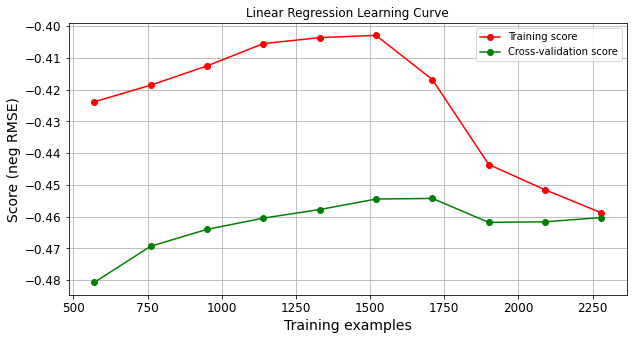

In [341]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineWhite_train, y_wineWhite_train)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineWhite_train, y_wineWhite_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Modeling with test set

In [342]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


linreg = LinearRegression().fit(X_wineWhite_test, y_wineWhite_test)

print('White Wine dataset')
print('R-squared score (test set): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_training.append(linreg.score(X_wineWhite_test, y_wineWhite_test))
#print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_validation.append(linreg.score(X_wineWhite_test, y_wineWhite_test))

# make predictions on the testing set
y_pred = linreg.predict(X_wineWhite_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))
#RMSE.append(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred)))                                  

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
print('**************************************************************')



White Wine dataset
R-squared score (test set): 0.899
RMSE: 0.390
linear model intercept: 726.0297442057547
linear model coeff:
[ 4.90232200e-01  5.23568008e-01  3.22284851e-01  2.47987096e-01
  3.23226964e-01 -3.01390250e-03  1.26145639e-03 -7.33182989e+02
  2.36064763e+00  9.32946905e-01]
Number of non-zero features: 10
**************************************************************


[[-0.38871943 -0.37816721 -0.39836802 -0.6354147  -0.37473578 -0.37584237
  -0.36792697 -0.41301121 -0.37329537 -0.36212671]
 [-0.37918541 -0.38864344 -0.39157523 -0.59272635 -0.37200623 -0.3754471
  -0.37256276 -0.4111949  -0.36456103 -0.37693591]
 [-0.40428206 -0.56592901 -0.38532002 -0.56368528 -0.37307411 -0.37587961
  -0.38087481 -0.39976621 -0.36843737 -0.3734562 ]
 [-0.5539039  -0.54817288 -0.37813902 -0.54016718 -0.5537502  -0.38213753
  -0.37939617 -0.39217517 -0.3817892  -0.39239734]
 [-0.53724448 -0.54058809 -0.38171833 -0.52614992 -0.53624299 -0.37463596
  -0.38955533 -0.38447566 -0.38291208 -0.38713846]
 [-0.5201058  -0.52553099 -0.37485625 -0.51196535 -0.52402193 -0.37436346
  -0.388659   -0.38440429 -0.38309169 -0.52727155]
 [-0.50771584 -0.51224987 -0.37217495 -0.50063241 -0.50994824 -0.37258251
  -0.38441943 -0.37948361 -0.38118729 -0.51223822]
 [-0.49808981 -0.50248484 -0.37255795 -0.49059495 -0.50183195 -0.3775112
  -0.38241843 -0.38016584 -0.51194986 -0.50208471]
 [

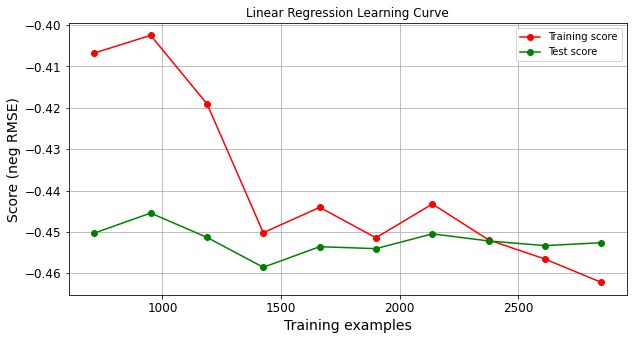

In [343]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineWhite, y_wineWhite)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineWhite, y_wineWhite, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

In [344]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]

    print('round: ', count)
    count = count + 1
    linreg = LinearRegression().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linreg.score(X_train_cv, y_train_cv))
    print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linreg.score(X_test_cv, y_test_cv))
    
    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('linear model intercept: {}'.format(linreg.intercept_))
    print('linear model coeff:\n{}'.format(linreg.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
    print('**************************************************************')
    
print("Average Red Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

round:  1
White Wine dataset
R-squared score (training): 0.673
R-squared score (validation test): 0.692
RMSE: 0.602
linear model intercept: 604.9605734900196
linear model coeff:
[ 5.35069313e-01  2.44370639e-01  6.22997355e-01  2.74415173e-01
 -1.10056638e+00 -2.18872481e-03 -2.73022096e-03 -6.15105436e+02
  3.77760293e+00  1.30569367e+00]
Number of non-zero features: 10
**************************************************************
round:  2
White Wine dataset
R-squared score (training): 0.682
R-squared score (validation test): 0.608
RMSE: 0.650
linear model intercept: 610.1664859908282
linear model coeff:
[ 5.46341294e-01  2.08508706e-01  6.18175046e-01  2.77563812e-01
 -1.14372689e+00 -3.24295748e-03 -2.42117686e-03 -6.20530274e+02
  3.80547874e+00  1.35486103e+00]
Number of non-zero features: 10
**************************************************************
round:  3
White Wine dataset
R-squared score (training): 0.661
R-squared score (validation test): 0.741
RMSE: 0.665
linear mod

[[-0.51366408 -0.59967798 -0.60450946 -0.57756436 -0.57305076 -0.56900171
  -0.57745774 -0.58115606 -0.59168333 -0.53035318]
 [-0.59444876 -0.63015635 -0.599054   -0.54939796 -0.5829775  -0.59224194
  -0.55330933 -0.58445029 -0.57749151 -0.55689291]
 [-0.59113422 -0.63640188 -0.61042636 -0.59712077 -0.59899262 -0.62271538
  -0.55346628 -0.62304724 -0.56102954 -0.55046419]
 [-0.60155736 -0.63340055 -0.62889178 -0.59968397 -0.60255375 -0.59340753
  -0.57753699 -0.61074326 -0.57549326 -0.56342203]
 [-0.59962986 -0.62681215 -0.6385984  -0.59998907 -0.5966943  -0.59099025
  -0.58809042 -0.61494599 -0.61628883 -0.57141178]
 [-0.60248666 -0.63069094 -0.64631145 -0.61548076 -0.59354152 -0.60589719
  -0.59855446 -0.59734897 -0.61203298 -0.58065256]
 [-0.59641515 -0.63294451 -0.6396668  -0.6070836  -0.59357058 -0.59868377
  -0.60078294 -0.59770439 -0.61379363 -0.58644057]
 [-0.60385192 -0.62494935 -0.62893373 -0.60500654 -0.59957663 -0.59968132
  -0.61356668 -0.60017619 -0.60994871 -0.59491804]


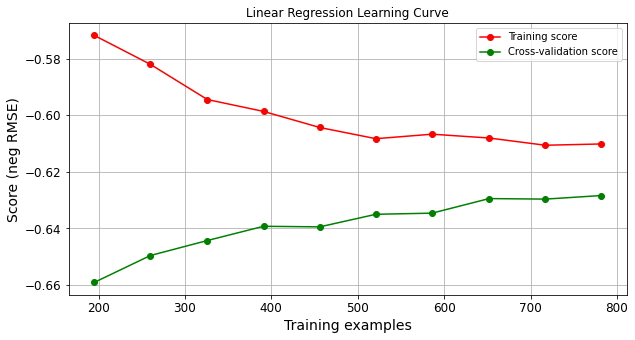

In [345]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineRed_train, y_wineRed_train)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineRed_train, y_wineRed_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Modeling with test set 

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


linreg = LinearRegression().fit(X_wineRed_test, y_wineRed_test)

print('White Wine dataset')
print('R-squared score (test set): {:.3f}'.format(linreg.score(X_wineRed_test, y_wineRed_test)))
#R_Squared_score_training.append(linreg.score(X_wineWhite_test, y_wineWhite_test))
#print('R-squared score (validation test): {:.3f}'.format(linreg.score(X_wineWhite_test, y_wineWhite_test)))
#R_Squared_score_validation.append(linreg.score(X_wineWhite_test, y_wineWhite_test))

# make predictions on the testing set
y_pred = linreg.predict(X_wineRed_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))
#RMSE.append(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred)))                                  

print('linear model intercept: {}'.format(linreg.intercept_))
print('linear model coeff:\n{}'.format(linreg.coef_))

print('Number of non-zero features: {}'.format(np.sum(linreg.coef_ != 0)))
print('**************************************************************')


White Wine dataset
R-squared score (test set): 0.719
RMSE: 0.579
linear model intercept: 618.9470650147446
linear model coeff:
[ 4.96443706e-01  5.77501397e-01  1.20958390e+00  3.33725766e-01
 -1.80308964e+00  1.01895886e-03 -2.15882054e-03 -6.28863697e+02
  3.68677270e+00  1.09213857e+00]
Number of non-zero features: 10
**************************************************************


[[-0.57462855 -0.64723662 -0.56584996 -0.60136155 -0.59325314 -0.60643768
  -0.54450944 -0.5672202  -0.57634112 -0.58855186]
 [-0.56129751 -0.63534858 -0.5722443  -0.58620581 -0.59413035 -0.59004287
  -0.56941759 -0.54757695 -0.57004832 -0.58592083]
 [-0.57699896 -0.61237729 -0.56770834 -0.57818326 -0.60385635 -0.61502663
  -0.57578326 -0.57868121 -0.58554281 -0.58876101]
 [-0.59132042 -0.62445236 -0.57920946 -0.58032193 -0.60874388 -0.61326144
  -0.57394661 -0.58647484 -0.59745459 -0.5992509 ]
 [-0.59758506 -0.62069495 -0.5771402  -0.57829764 -0.62156558 -0.60317608
  -0.58711591 -0.59210009 -0.5925485  -0.60813661]
 [-0.61387193 -0.61555812 -0.57917067 -0.58327762 -0.62155085 -0.61640491
  -0.6043237  -0.60480533 -0.59137773 -0.6256655 ]
 [-0.61742364 -0.61601305 -0.57119645 -0.5853235  -0.6214162  -0.61127024
  -0.60520326 -0.60995446 -0.59810023 -0.61909079]
 [-0.62207069 -0.62614597 -0.57981013 -0.58340353 -0.61335733 -0.62535711
  -0.6036311  -0.61425394 -0.60558623 -0.62036408]


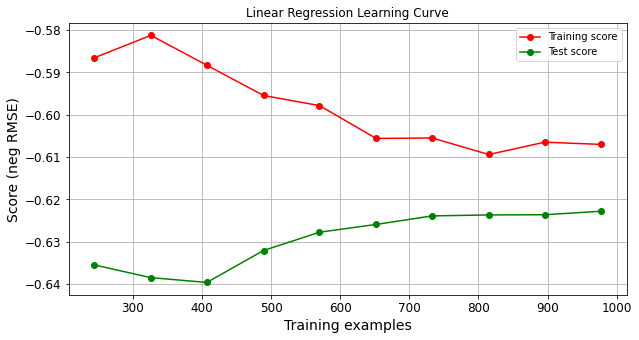

In [347]:
from sklearn.model_selection import learning_curve

linreg = LinearRegression().fit(X_wineRed, y_wineRed)
train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linreg, X_wineRed, y_wineRed, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### (b) K-Cross Validation for Multivariate Linear Regression Model with Gradient Descent

### Batch Gradient Descent

In [348]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "gradientDescent"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### White Wine

In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings('ignore')

In [350]:
X_wineWhite_train = X_wineWhite_train.to_numpy()
print(type(X_wineWhite_train))

<class 'numpy.ndarray'>


In [351]:
y_wineWhite_train = y_wineWhite_train.to_numpy()
print(type(y_wineWhite_train))

<class 'numpy.ndarray'>


In [353]:
X_wineWhite_train.shape

(3168, 10)

In [354]:
y_wineWhite_train.shape

(3168,)

In [362]:
y = y_wineWhite_train.T
y

array([ 9.4,  9.5, 12.8, ..., 11.1, 11.6, 10.2])

In [363]:
X = np.c_[np.ones((3168,1)), X_wineWhite_train]

In [364]:
print(X.shape)

(3168, 11)


In [384]:
def batch_Gradient_Descent(alpha):
    # learning rate
    print("alpha=============,", alpha)

    #number of iterations
    n_iter = 1000

    # the number of data points
    n = 11
    theta = np.random.randn(11, 1)

    preCost = sys.maxsize
    bestCost = preCost

    preTheta = np.random.randn(11, 1)
    bestTheta = preTheta

    changeCost = bestCost

    # the process of gradient descent
    for iteration in range(n_iter):
        gradients = (1/n) * X_train.T.dot(X_train.dot(theta) - np.vstack(y_train))
        theta = theta - alpha*gradients

        cost = (X_train.dot(theta) - np.vstack(y_train)).T.dot(X_train.dot(theta) - np.vstack(y_train))[0][0] * (1/(2*n))
        if preCost-cost>0:
            bestCost = cost
            bestTheta = theta
            changeCost = preCost-cost
        else:
            break

        preCost = cost
        preTheta = theta    
    print("bestCost:",bestCost)
    print("preCost-cost:",changeCost)

    theta = bestTheta

    y_train_predict = X_train.dot(theta)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    print('training RMSE: {:.3f}'.format(train_error))

    y_test_predict = X_test.dot(theta)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    print('testing RMSE: {:.3f}\n'.format(test_error))
    
    return train_error, test_error

In [387]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)

train_errors = []
test_errors = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_error, test_error = batch_Gradient_Descent(0.0000001)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
print('average training RMSE: ', sum(train_errors)/10)
print('average testing RMSE: ', sum(test_errors)/10)
    
    

alpha=============, 1e-07
bestCost: 1813.7321228536225
preCost-cost: 0.9063666707027096
training RMSE: 3.741
testing RMSE: 3.748

alpha=============, 1e-07
bestCost: 1723.9181281407873
preCost-cost: 0.6088916050980515
training RMSE: 3.647
testing RMSE: 3.479

alpha=============, 1e-07
bestCost: 7651.659983711194
preCost-cost: 2.9049289391114144
training RMSE: 7.684
testing RMSE: 8.326

alpha=============, 1e-07
bestCost: 5634.865708616693
preCost-cost: 4.1282536663266
training RMSE: 6.594
testing RMSE: 6.047

alpha=============, 1e-07
bestCost: 3155.699874818619
preCost-cost: 1.0989217143414862
training RMSE: 4.935
testing RMSE: 4.948

alpha=============, 1e-07
bestCost: 2490.8483263116646
preCost-cost: 1.7171405854992372
training RMSE: 4.384
testing RMSE: 3.834

alpha=============, 1e-07
bestCost: 3790.849517071285
preCost-cost: 3.5978950284561506
training RMSE: 5.409
testing RMSE: 5.152

alpha=============, 1e-07
bestCost: 1313.3548835617928
preCost-cost: 0.32471759546820067
training

### Red Wine

In [389]:
X_wineRed_train = X_wineRed_train.to_numpy()
print(type(X_wineRed_train))

<class 'numpy.ndarray'>


In [390]:
y_wineRed_train = y_wineRed_train.to_numpy()
print(type(y_wineRed_train))

<class 'numpy.ndarray'>


In [391]:
X_wineRed_train.shape

(1087, 10)

In [393]:
y_wineRed_train.shape

(1087,)

In [395]:
y = y_wineRed_train.T
y

array([ 9.3,  9.8, 12.7, ...,  9.9, 12.5,  9.6])

In [397]:
X = np.c_[np.ones((1087,1)), X_wineRed_train]

In [398]:
print(X.shape)

(1087, 11)


In [399]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)

train_errors = []
test_errors = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    train_error, test_error = batch_Gradient_Descent(0.0000001)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
print('average training RMSE: ', sum(train_errors)/10)
print('average testing RMSE: ', sum(test_errors)/10)

alpha=============, 1e-07
bestCost: 848.9237546068175
preCost-cost: 0.4683719887816551
training RMSE: 4.370
testing RMSE: 4.416

alpha=============, 1e-07
bestCost: 2183.908158772349
preCost-cost: 1.1940676074718795
training RMSE: 7.009
testing RMSE: 6.817

alpha=============, 1e-07
bestCost: 5174.1394849747585
preCost-cost: 5.424908133370991
training RMSE: 10.788
testing RMSE: 10.836

alpha=============, 1e-07
bestCost: 4419.406694981502
preCost-cost: 2.4888628803109896
training RMSE: 9.971
testing RMSE: 9.656

alpha=============, 1e-07
bestCost: 1955.9441833395817
preCost-cost: 1.6445594011779576
training RMSE: 6.633
testing RMSE: 6.165

alpha=============, 1e-07
bestCost: 1372.091439826991
preCost-cost: 1.3846174450627586
training RMSE: 5.556
testing RMSE: 5.409

alpha=============, 1e-07
bestCost: 1101.4336372388238
preCost-cost: 0.49255422871851806
training RMSE: 4.978
testing RMSE: 4.870

alpha=============, 1e-07
bestCost: 7753.348806369731
preCost-cost: 8.632392787203571
traini

### Regularized linear regression models with feature normalization

### Ridge Regression Model (L2 Penalty)

### White Wine

### No Normalization

In [ ]:
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, random_state=None, shuffle=True)

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []


count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    linridge = Ridge().fit(X_train_cv, y_train_cv)

    print('White Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_cv, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_cv, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*****************************************************************')
    
print("Average White Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

In [ ]:
from sklearn.model_selection import learning_curve

linridge = Ridge().fit(X_wineWhite_train, y_wineWhite_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_wineWhite_train, y_wineWhite_train, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Ridge Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Ridge Regularization with Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linridge = Ridge().fit(X_train_scaled, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*************************************************************')
    
print("Average White Wine Dataset with Normalization")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

### Find best alpha

In [ ]:
X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0,0.01, 0.05, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_wineWhite_train)
    r2_train = linridge.score(X_train_scaled, y_wineWhite_train)
    r2_test = linridge.score(X_test_scaled, y_wineWhite_testCV)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.4f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.4f}, r-squared test: {:.4f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### LR with Ridge Regression, Normalization, and optimal alpha

In [ ]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)


    linridge = Ridge(alpha=1).fit(X_train_scaled, y_train_cv)

    print('White Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('******************************************************************')
    
print("Average White Wine Dataset with Normalization and Optimal Alpha")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

In [ ]:
from sklearn.model_selection import learning_curve

X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

linridge = Ridge(alpha = 10).fit(X_train_scaled, y_wineWhite_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_train_cv, y_train_cv, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### LR with Ridge Regression, Normalization, and optimal alpha Using Test Set

In [ ]:
X_test_scaled = scaler.transform(X_wineWhite_test)
X_train_scaled = scaler.transform(X_wineWhite_train)


linridge = Ridge(alpha=1).fit(X_train_scaled, y_wineWhite_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_wineWhite_train)))
print('R-squared score (testing): {:.3f}'
     .format(linridge.score(X_test_scaled, y_wineWhite_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
print('******************************************************************')
    

In [ ]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineWhite_test)
linridge = Ridge(alpha=1).fit(X_test_scaled, y_wineWhite_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_test_scaled, y_wineWhite_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

### No Normalization

In [ ]:
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, random_state=None, shuffle=True)

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []


count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    linridge = Ridge().fit(X_train_cv, y_train_cv)

    print('Red Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_cv, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_cv, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_cv, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_cv, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*****************************************************************')
    
print("Average Red Wine Dataset")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

### Ridge Regularization with Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1
    
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linridge = Ridge().fit(X_train_scaled, y_train_cv)

    print('Red Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))
    
    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('*************************************************************')
    
print("Average Red Wine Dataset with Normalization")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

### Find best alpha

In [ ]:
X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0,0.01, 0.05, 0.1, 0.5, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_wineRed_train)
    r2_train = linridge.score(X_train_scaled, y_wineRed_train)
    r2_test = linridge.score(X_test_scaled, y_wineRed_testCV)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.4f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.4f}, r-squared test: {:.4f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

### LR with Ridge Regression, Normalization, and optimal alpha

In [ ]:
R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)


    linridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train_cv)

    print('Red Wine dataset')
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linridge.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linridge.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

    print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
    print('******************************************************************')
    
print("Average Red Wine Dataset with Normalization and Optimal Alpha")
R_Squared_score_training_mean = sum(R_Squared_score_training)/10
print("R-Squared score mean (training): ", R_Squared_score_training_mean)
                
R_Squared_score_validation_mean = sum(R_Squared_score_validation)/10
print("R-Squared score mean (validation): ", R_Squared_score_validation_mean)
                
RMSE_mean = sum(RMSE)/10
print("RMSE mean: ", RMSE_mean)

In [ ]:
from sklearn.model_selection import learning_curve

X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

linridge = Ridge(alpha = 0.1).fit(X_train_scaled, y_wineRed_train)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_train_cv, y_train_cv, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### LR with Ridge Regression, Normalization, and optimal alpha using test set

In [ ]:
X_test_scaled = scaler.transform(X_wineRed_test)
X_train_scaled = scaler.transform(X_wineRed_train)

linridge = Ridge(alpha=1).fit(X_train_scaled, y_wineRed_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_wineRed_train)))
print('R-squared score (testing): {:.3f}'
     .format(linridge.score(X_test_scaled, y_wineRed_test)))

# make predictions on the testing set
y_pred = linridge.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))

print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('Number of non-zero features: {}'.format(np.sum(linridge.coef_ != 0)))
print('******************************************************************')

In [ ]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineRed_test)
linridge = Ridge(alpha=1).fit(X_test_scaled, y_wineRed_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linridge, X_test_scaled, y_wineRed_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Lasso Regression Model ( L1 Penalty)

### White Wine

### Optimal Parameter Alpha

In [ ]:
from sklearn.linear_model import Lasso
X_wineWhite_train, X_wineWhite_testCV, y_wineWhite_train, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.00005, 0.0001, 0.0005, 0.001,0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]:
    linlasso = Lasso(alpha, max_iter = 100000).fit(X_train_scaled, y_wineWhite_train)
    r2_train = linlasso.score(X_train_scaled, y_wineWhite_train)
    r2_test = linlasso.score(X_test_scaled, y_wineWhite_testCV)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Lasso Regression with Optimal Alpha

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineWhite_train):

    X_train_cv, X_test_cv = X_wineWhite_train.iloc[train_index], X_wineWhite_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineWhite_train.iloc[train_index], y_wineWhite_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train_cv)

    print('White wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linlasso.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linlasso.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}\n'
         .format(linlasso.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linlasso.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

    print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

    print('Features with non-zero weight (sorted by absolute magnitude):')
    for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                    key = lambda e: -abs(e[1])):
        if e[1] != 0:
            print('\t{}, {:.3f}'.format(e[0], e[1]))

    print('******************************************************************')
    
print('Average White Wine')
print('R-Squared (training): {:.3f}'.format(sum(R_Squared_score_training)/10))
print('R-Squared (testing): {:.3f}'.format(sum(R_Squared_score_validation)/10))
print('RMSE: {:.3f}'.format(sum(RMSE)/10))





In [ ]:
from sklearn.model_selection import learning_curve

X_wineWhite_trainCV, X_wineWhite_testCV, y_wineWhite_trainCV, y_wineWhite_testCV = train_test_split(X_wineWhite_train, y_wineWhite_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineWhite_trainCV)
X_test_scaled = scaler.transform(X_wineWhite_testCV)

linLasso = Lasso(alpha = 0.01).fit(X_train_scaled, y_wineWhite_trainCV)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_train_scaled, y_wineWhite_trainCV, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Lasso Regression with Optimal Alpha using Test Set

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_wineWhite_train)
X_test_scaled = scaler.fit_transform(X_wineWhite_test)

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_wineWhite_train)

print('White Wine dataset')
print('R-squared score (training): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_wineWhite_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_wineWhite_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
print('******************************************************************')



In [ ]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineWhite_test)
linLasso = Lasso(alpha=0.01).fit(X_test_scaled, y_wineWhite_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_test_scaled, y_wineWhite_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression with Lasso Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Red Wine

### Optimal Parameter Alpha

In [ ]:
from sklearn.linear_model import Lasso
X_wineRed_train, X_wineRed_testCV, y_wineRed_train, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.transform(X_wineRed_testCV)

print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.00005, 0.0001, 0.0005, 0.001,0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]:
    linlasso = Lasso(alpha, max_iter = 100000).fit(X_train_scaled, y_wineRed_train)
    r2_train = linlasso.score(X_train_scaled, y_wineRed_train)
    r2_test = linlasso.score(X_test_scaled, y_wineRed_testCV)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

### Lasso Regression with Optimal Alpha

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

R_Squared_score_training = []
R_Squared_score_validation = []
RMSE = []

count = 1
for train_index, test_index in kf.split(X_wineRed_train):

    X_train_cv, X_test_cv = X_wineRed_train.iloc[train_index], X_wineRed_train.iloc[test_index]
    y_train_cv, y_test_cv = y_wineRed_train.iloc[train_index], y_wineRed_train.iloc[test_index]
 
   
    print('round: ', count)
    count = count + 1

    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)

    linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_train_cv)

    print('Wine dataset')

    print('R-squared score (training): {:.3f}'
         .format(linlasso.score(X_train_scaled, y_train_cv)))
    R_Squared_score_training.append(linlasso.score(X_train_scaled, y_train_cv))
    print('R-squared score (test): {:.3f}\n'
         .format(linlasso.score(X_test_scaled, y_test_cv)))
    R_Squared_score_validation.append(linlasso.score(X_test_scaled, y_test_cv))

    # make predictions on the testing set
    y_pred = linreg.predict(X_test_cv)
    print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred))))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test_cv, y_pred)))

    print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
    print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

    print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

    print('Features with non-zero weight (sorted by absolute magnitude):')
    for e in sorted (list(zip(list(X_wineRed_train), linlasso.coef_)),
                    key = lambda e: -abs(e[1])):
        if e[1] != 0:
            print('\t{}, {:.3f}'.format(e[0], e[1]))
    print('******************************************************************')

print('Average Red Wine')
print('R-Squared (training): {:.3f}'.format(sum(R_Squared_score_training)/10))
print('R-Squared (testing): {:.3f}'.format(sum(R_Squared_score_validation)/10))
print('RMSE: {:.3f}'.format(sum(RMSE)/10))

In [ ]:
from sklearn.model_selection import learning_curve

X_wineRed_trainCV, X_wineRed_testCV, y_wineRed_trainCV, y_wineRed_testCV = train_test_split(X_wineRed_train, y_wineRed_train, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_wineRed_trainCV)
X_test_scaled = scaler.transform(X_wineRed_testCV)

linLasso = Lasso(alpha = 0.01).fit(X_train_scaled, y_wineRed_trainCV)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_train_scaled, y_wineRed_trainCV, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('LR Ridge with Normalization and Optimal Alpha Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### Lasso Regression with Optimal Alpha Using Test Set

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_wineRed_train)
X_test_scaled = scaler.fit_transform(X_wineRed_test)

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train_scaled, y_wineRed_train)

print('Red Wine dataset')
print('R-squared score (train): {:.3f}\n'
     .format(linlasso.score(X_train_scaled, y_wineRed_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_wineRed_test)))

# make predictions on the testing set
y_pred = linreg.predict(X_test_scaled)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))

print('lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'.format(linlasso.coef_))

print('Non-zero features: {}'.format(np.sum(linlasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_wineWhite_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
print('******************************************************************')

In [ ]:
from sklearn.model_selection import learning_curve

X_test_scaled = scaler.transform(X_wineRed_test)
linLasso = Lasso(alpha=0.01).fit(X_test_scaled, y_wineRed_test)

train_sizes = np.linspace(0.2,0.8,10)
train_sizes, train_RMSE, test_RMSE = learning_curve(linLasso, X_test_scaled, y_wineRed_test, train_sizes = train_sizes, 
                                scoring='neg_root_mean_squared_error',cv=10, shuffle = True)

print(train_RMSE)
print(test_RMSE)

train_scores_mean = np.mean(train_RMSE, axis=1)
test_scores_mean = np.mean(test_RMSE, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
ax.set_title('Linear Regression with Lasso Regularization Learning Curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (neg RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test score")
ax.legend(loc="best")

plt.show()

### Polynomial Regression Models

### White Wine

(1) Training and Validation Set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_train, y_wineWhite_train, random_state=0)

for d in [1,2,3,4,5,6,7,8]:
    print('Polynomial Regression Degree: {}'.format(d))
    polynomial_features = PolynomialFeatures(degree=d)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    PolyReg = LinearRegression()
    PolyReg.fit(X_poly_train, y_train)
    print('\t R-squared score (training): {:.3f}'
         .format(PolyReg.score(X_poly_train, y_train)))
    print('\t R-squared score (test): {:.3f}'
         .format(PolyReg.score(X_poly_test, y_test)))
    # make predictions on the testing set
    y_pred = PolyReg.predict(X_poly_test)
    print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(2) Test Set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
# X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_test, y_wineWhite_train, random_state=0)

# for d in [1,2,3,4,5,6,7,8]:
print('Polynomial Regression Degree: {}'.format(1))
polynomial_features = PolynomialFeatures(degree=1)
X_poly_train = polynomial_features.fit_transform(X_wineWhite_train)
X_poly_test = polynomial_features.transform(X_wineWhite_test)
PolyReg = LinearRegression()
PolyReg.fit(X_poly_train, y_wineWhite_train)
print('\t R-squared score (training): {:.3f}'
     .format(PolyReg.score(X_poly_train, y_wineWhite_train)))
print('\t R-squared score (test): {:.3f}'
     .format(PolyReg.score(X_poly_test, y_wineWhite_test)))
# make predictions on the testing set
y_pred = PolyReg.predict(X_poly_test)
print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineWhite_test, y_pred))))

### Red Wine

(1) Training - Validation Set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
print('Red Wine dataset')
X_train, X_test, y_train, y_test = train_test_split(X_wineRed_train, y_wineRed_train, random_state=0)
for d in [1,2,3,4,5,6,7,8]:
    print('Polynomial Regression Degree: {}'.format(d))
    polynomial_features = PolynomialFeatures(degree=d)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    PolyReg = LinearRegression()
    PolyReg.fit(X_poly_train, y_train)
    print('\t R-squared score (training): {:.3f}'
         .format(PolyReg.score(X_poly_train, y_train)))
    print('\t R-squared score (test): {:.3f}'
         .format(PolyReg.score(X_poly_test, y_test)))
    # make predictions on the testing set
    y_pred = PolyReg.predict(X_poly_test)
    print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

(2) Testing Set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

print('White Wine dataset')
# X_train, X_test, y_train, y_test = train_test_split(X_wineWhite_test, y_wineWhite_train, random_state=0)

# for d in [1,2,3,4,5,6,7,8]:
print('Polynomial Regression Degree: {}'.format(1))
polynomial_features = PolynomialFeatures(degree=1)
X_poly_train = polynomial_features.fit_transform(X_wineRed_train)
X_poly_test = polynomial_features.transform(X_wineRed_test)
PolyReg = LinearRegression()
PolyReg.fit(X_poly_train, y_wineRed_train)
print('\t R-squared score (training): {:.3f}'
     .format(PolyReg.score(X_poly_train, y_wineRed_train)))
print('\t R-squared score (test): {:.3f}'
     .format(PolyReg.score(X_poly_test, y_wineRed_test)))
# make predictions on the testing set
y_pred = PolyReg.predict(X_poly_test)
print('\t RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_wineRed_test, y_pred))))